<a href="https://colab.research.google.com/github/balkisslama/assignment/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving regression.csv to regression (1).csv


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("regression.csv")
df.head(10)

,house_size_sqft,price_usd
0,1436.350297,194940.735735
1,2876.785766,333193.466345
2,2329.984855,284374.897101
3,1996.646210,219851.087330
4,890.046601,135709.581793
5,889.986301,144355.318657
6,645.209030,136689.313713
7,2665.440364,308769.983170
8,2002.787529,238151.348892
9,2270.181444,269491.788795


In [ ]:
df.describe()

,house_size_sqft,price_usd
count,100.000000,100.000000
mean,1675.451858,217528.980442
std,743.723528,73577.146935
min,513.805293,97515.458714
25%,983.001902,154788.341755
50%,1660.356137,210100.492085
75%,2325.507798,283056.636161
max,2967.217342,358449.077227


In [ ]:
df.shape

(100, 2)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [ ]:
#defining our output y (price_usd)and input x (house_size)
X = df[['house_size_sqft']]  # Features (must be 2D)
y = df['price_usd']          # Target (1D)


In [ ]:
#split the data into training and testing sets: 80 rows for training, 20 for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
#Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


#Explanation:

# model = LinearRegression(): creating an object of the LinearRegression class from scikit-learn.
#it's like creating a blank model; an untrained "brain".
#This object (model) will later learn the relationship between house_size_sqft and price_usd.

# model.fit(X_train, y_train):

#Now you’re training the model using your training data.
#X_train: input data (house sizes)
#y_train: target data (prices)
#Here’s what happens under the hood:
#The model analyzes the pattern between house size and price.
#It finds the best straight line (like y = mx + b) that fits your training data.
#It stores the slope (m, called coef_) and intercept (b, called intercept_) internally.
#After this step, the model is ready to make predictions.

LinearRegression()

In [ ]:
#Making a prediction
predicted_price = model.predict([[2000]])  # Predict price for 2000 sqft house
print(f"Predicted Price: ${predicted_price[0]:,.2f}")

#The model applies the learned formula (line equation):
#price=aX+b
#The result is stored in predicted_price, which is a list-like object (NumPy array) containing one value.

Predicted Price: $249,238.93


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


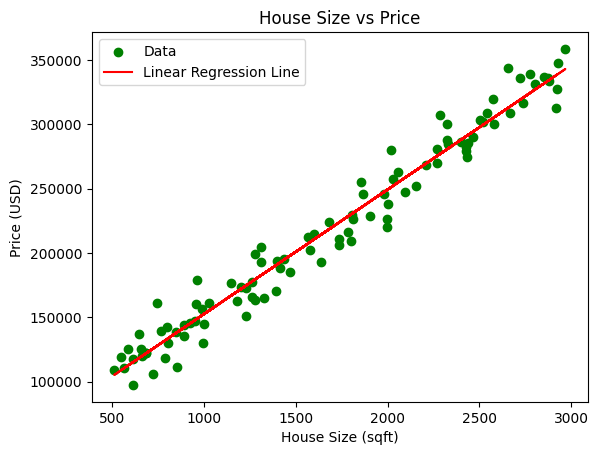

In [ ]:
#Visualise the result

plt.scatter(X, y, color='green', label='Data')
plt.plot(X, model.predict(X), color='red', label='Linear Regression Line')
plt.xlabel('House Size (sqft)')
plt.ylabel('Price (USD)')
plt.title('House Size vs Price')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 150757943.43066233
R-squared: 0.9590881264743384
